Saving Dataset .csv to Dataset .csv
(9551, 21)
Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


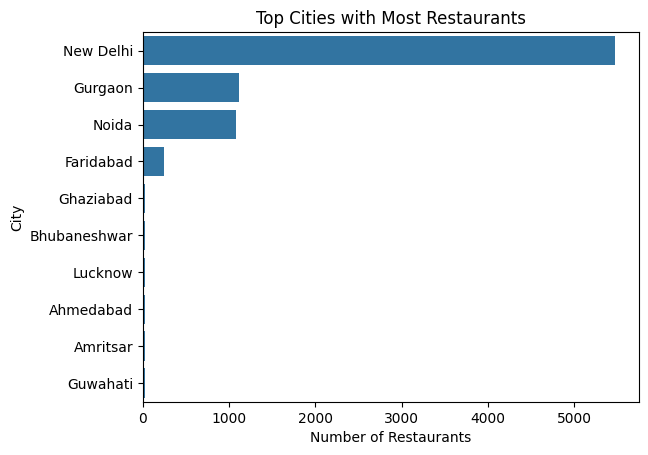

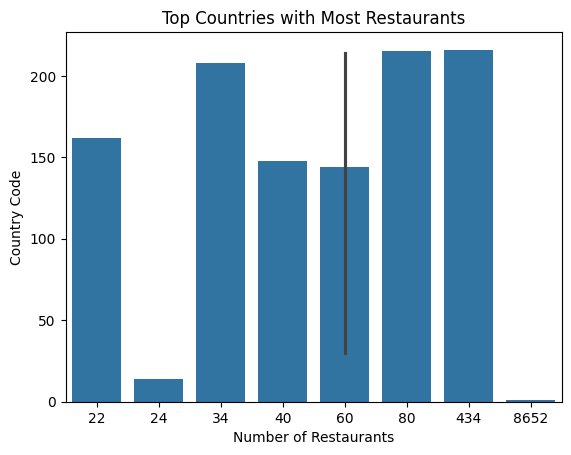

                  Latitude  Longitude  Aggregate rating
Latitude          1.000000   0.043207          0.000516
Longitude         0.043207   1.000000         -0.116818
Aggregate rating  0.000516  -0.116818          1.000000


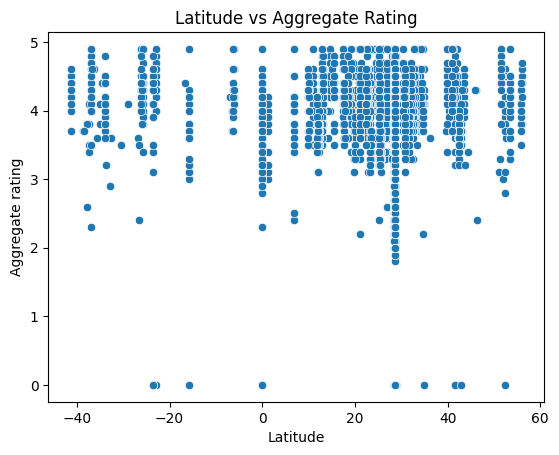

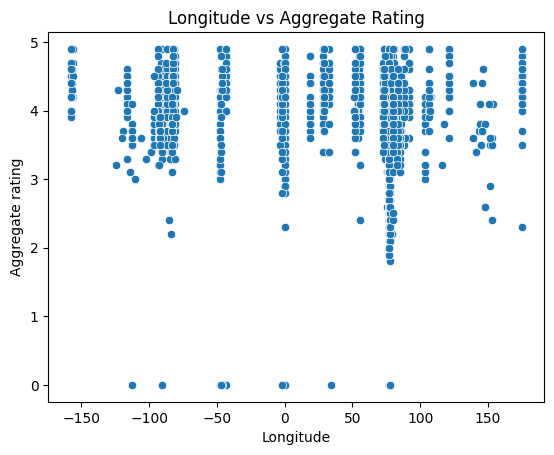

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from google.colab import files

uploaded = files.upload()
file_name = list(uploaded.keys())[0]
data = pd.read_csv(file_name)

print(data.shape)
print(data.columns)

map_center = [data['Latitude'].mean(), data['Longitude'].mean()]
restaurant_map = folium.Map(location=map_center, zoom_start=5)

for _, row in data.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=3,
        popup=str(row['Aggregate rating']),
        fill=True
    ).add_to(restaurant_map)

restaurant_map

city_count = data['City'].value_counts().head(10)

plt.figure()
sns.barplot(x=city_count.values, y=city_count.index)
plt.xlabel("Number of Restaurants")
plt.ylabel("City")
plt.title("Top Cities with Most Restaurants")
plt.show()

country_count = data['Country Code'].value_counts().head(10)

plt.figure()
sns.barplot(x=country_count.values, y=country_count.index)
plt.xlabel("Number of Restaurants")
plt.ylabel("Country Code")
plt.title("Top Countries with Most Restaurants")
plt.show()

correlation = data[['Latitude', 'Longitude', 'Aggregate rating']].corr()
print(correlation)

plt.figure()
sns.scatterplot(x='Latitude', y='Aggregate rating', data=data)
plt.title("Latitude vs Aggregate Rating")
plt.show()

plt.figure()
sns.scatterplot(x='Longitude', y='Aggregate rating', data=data)
plt.title("Longitude vs Aggregate Rating")
plt.show()
